# **Data Loading**

In [127]:
from google.colab import files
import zipfile
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
# Install public API Kaggle
!pip install kaggle

In [129]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yumiyui","key":"fb74ac309cb02bafdc48282f179e3268"}'}

In [130]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [131]:
!kaggle datasets download -d muhammetvarl/laptop-price

laptop-price.zip: Skipping, found more recently modified local copy (use --force to force download)


**load the dataset**

In [132]:
zip_ref = zipfile.ZipFile('/content/laptop-price.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [188]:
df = pd.read_csv('/content/laptop_price.csv', encoding="latin-1" )

In [189]:
print(f'\n\nTotal Datasets : {df.shape}\n\n\n')
df



Total Datasets : (1303, 13)





,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [191]:
df = df.drop(['Product','laptop_ID'], axis= 1)

In [192]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [193]:
df.duplicated().sum()

29

In [194]:
df = df.drop_duplicates()

In [195]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [196]:
df.Company.value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<ipython-input-197-81c543d55dde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company', data=df,


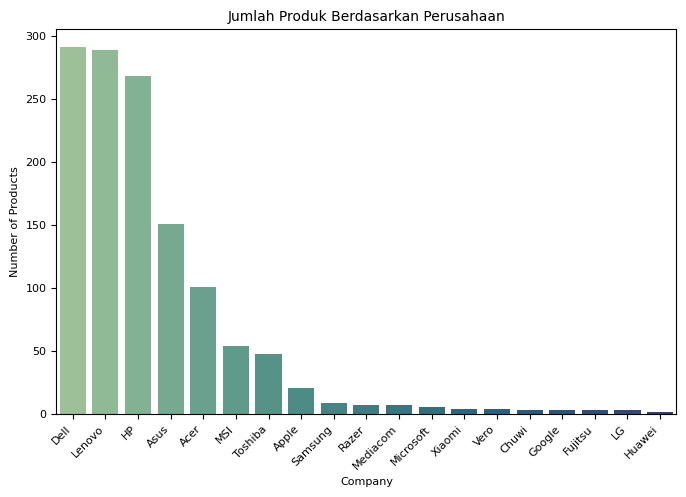

In [197]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Company', data=df,
              order=df['Company'].value_counts().index, palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Jumlah Produk Berdasarkan Perusahaan', fontsize=10)
plt.xlabel('Company', fontsize=8)
plt.ylabel('Number of Products', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

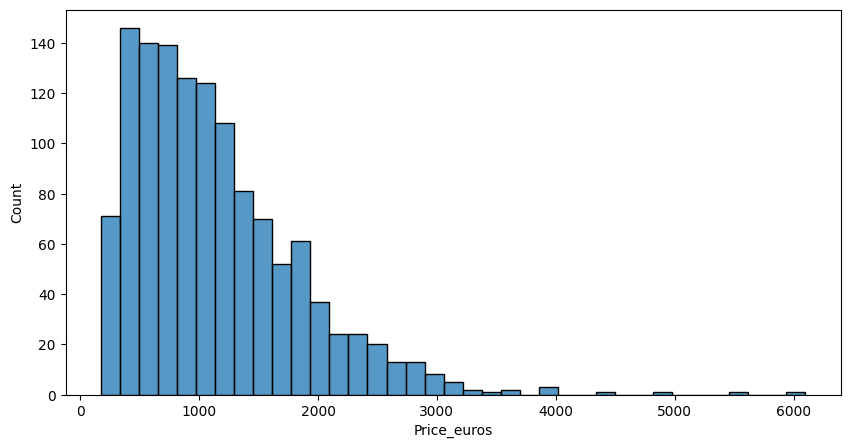

In [198]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price_euros'])
plt.show()

<ipython-input-199-0848689a23a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand_price_mean = df.groupby('Company').mean()['Price_euros'].sort_values(ascending=False)


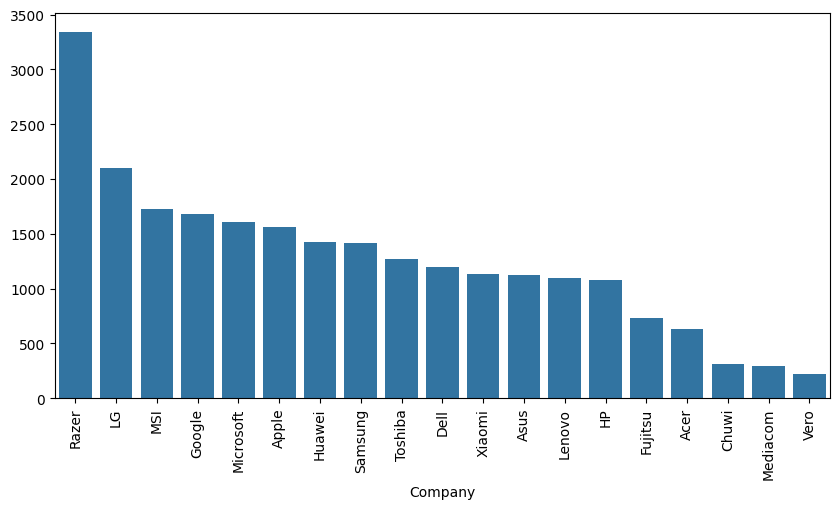

In [199]:
brand_price_mean = df.groupby('Company').mean()['Price_euros'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=brand_price_mean.index, y=brand_price_mean.values)
plt.xticks(rotation=90)
plt.show()

<ipython-input-200-026d24ce405d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  processor_price_mean = df.groupby('Cpu').mean()['Price_euros'].sort_values(ascending=False).head(10)


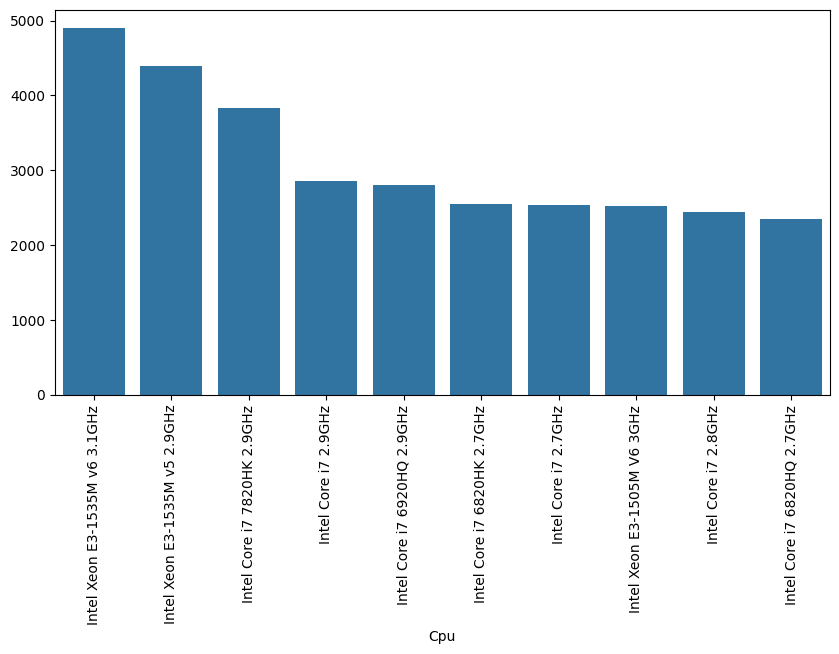

In [200]:
processor_price_mean = df.groupby('Cpu').mean()['Price_euros'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=processor_price_mean.index, y=processor_price_mean.values)
plt.xticks(rotation=90)
plt.show()

<ipython-input-201-e294523a0703>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  processor_price_mean = df.groupby('TypeName').mean()['Price_euros'].sort_values(ascending=False).head(10)


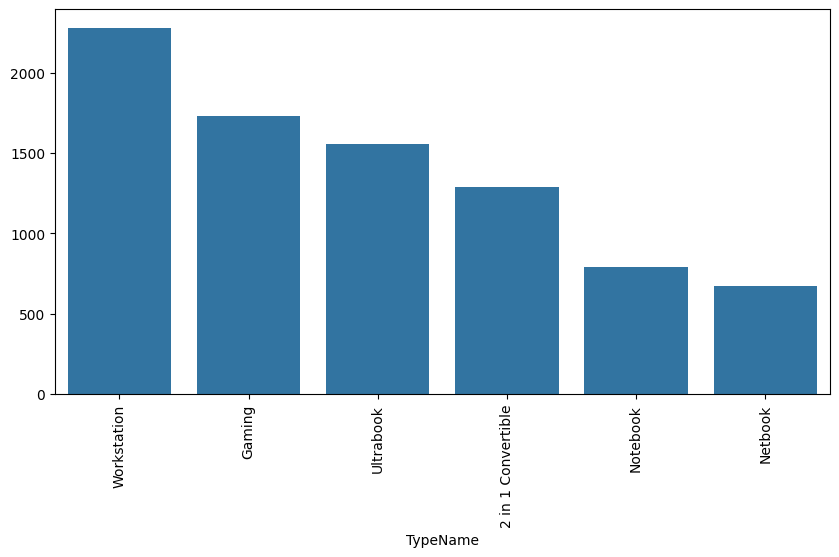

In [201]:
processor_price_mean = df.groupby('TypeName').mean()['Price_euros'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=processor_price_mean.index, y=processor_price_mean.values)
plt.xticks(rotation=90)
plt.show()

<ipython-input-202-d68d4716861b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  processor_price_mean = df.groupby('Gpu').mean()['Price_euros'].sort_values(ascending=False).head(10)


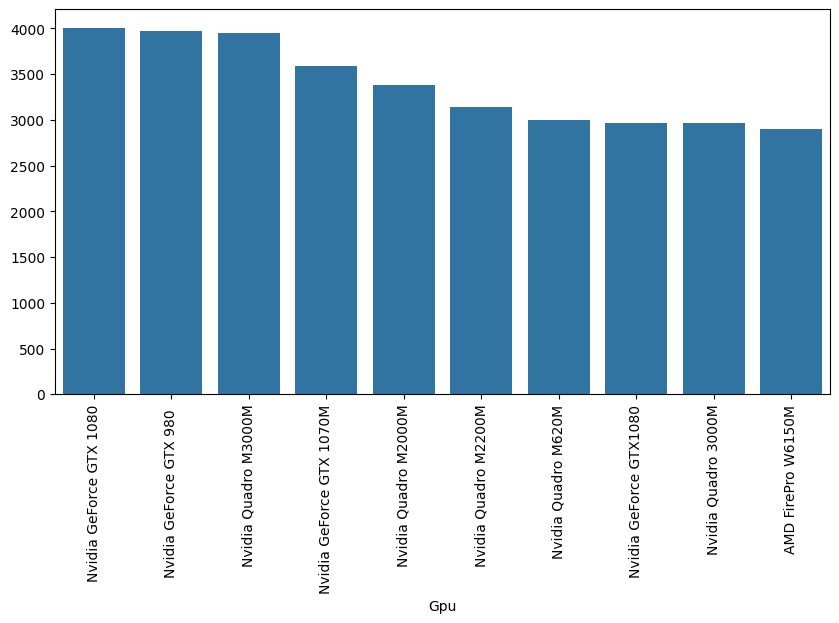

In [202]:
processor_price_mean = df.groupby('Gpu').mean()['Price_euros'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=processor_price_mean.index, y=processor_price_mean.values)
plt.xticks(rotation=90)
plt.show()

<ipython-input-203-dd4f54a9c194>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  processor_price_mean = df.groupby('OpSys').mean()['Price_euros'].sort_values(ascending=False).head(10)


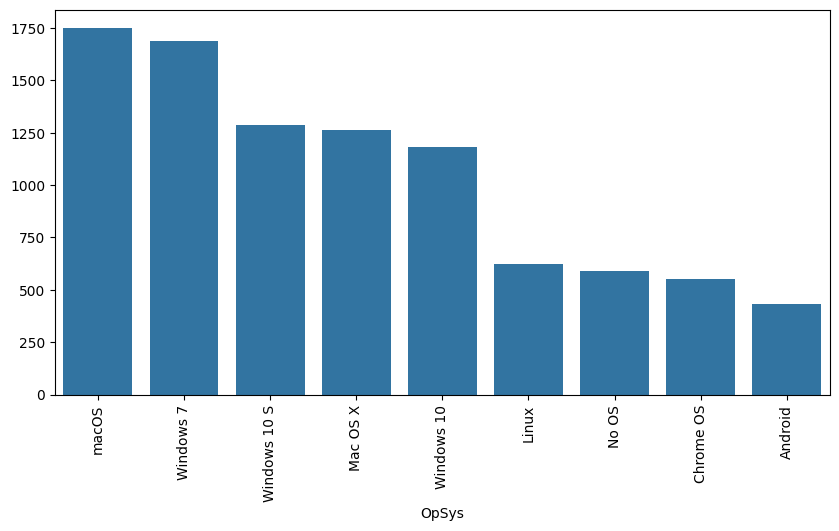

In [203]:
processor_price_mean = df.groupby('OpSys').mean()['Price_euros'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=processor_price_mean.index, y=processor_price_mean.values)
plt.xticks(rotation=90)
plt.show()

# **Data Cleaning**

In [204]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00


In [205]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen_Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen_Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [206]:
df = df.drop("ScreenResolution", axis=1)

In [207]:
df["CPU_Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU_Frequency_Hz"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])


In [208]:
df["CPU_Frequency_Hz"] = df["CPU_Frequency_Hz"].str[:-3]

In [209]:
df = df.drop(['Cpu'], axis=1)

In [210]:
df["Ram"]=df["Ram"].str.replace("GB","")

In [211]:
df["Weight"]=df["Weight"].str.replace("kg","")

In [212]:
df["Memory_Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory_Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [213]:
def memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1024
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1048576

In [214]:
df["Memory_Amount"] = df["Memory_Amount"].apply(memory_into_MB)

In [215]:
df = df.drop("Memory", axis=1)

In [216]:
df["Gpu_Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [217]:
df = df.drop("Gpu", axis=1)

In [218]:
df

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen_Width,Screen_Height,CPU_Brand,CPU_Frequency_Hz,Memory_Amount,Memory_Type,Gpu_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,Intel,2.3,131072.0,SSD,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,Intel,1.8,131072.0,Flash,Intel
2,HP,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,Intel,2.5,262144.0,SSD,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2880,1800,Intel,2.7,524288.0,SSD,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,2560,1600,Intel,3.1,262144.0,SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,Windows 10,2.2,720.32,1366,768,Intel,2.5,512000.0,HDD,Nvidia
1270,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.8,638.00,1920,1080,Intel,2.5,131072.0,SSD,Intel
1271,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.3,1499.00,3200,1800,Intel,2.5,524288.0,SSD,Intel
1272,Lenovo,Notebook,14.0,2,Windows 10,1.5,229.00,1366,768,Intel,1.6,65536.0,Flash,Intel


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   Ram               1274 non-null   object 
 4   OpSys             1274 non-null   object 
 5   Weight            1274 non-null   object 
 6   Price_euros       1274 non-null   float64
 7   Screen_Width      1274 non-null   object 
 8   Screen_Height     1274 non-null   object 
 9   CPU_Brand         1274 non-null   object 
 10  CPU_Frequency_Hz  1274 non-null   object 
 11  Memory_Amount     1274 non-null   float64
 12  Memory_Type       1274 non-null   object 
 13  Gpu_Brand         1274 non-null   object 
dtypes: float64(3), object(11)
memory usage: 149.3+ KB


In [220]:
df["Ram"] = df["Ram"].astype("int")
df["Screen_Width"] = df["Screen_Width"].astype("int")
df["Screen_Height"] = df["Screen_Height"].astype("int")
df["Weight"]=df["Weight"].astype("float64")
df["CPU_Frequency_Hz"]=df["CPU_Frequency_Hz"].astype("float64")

In [221]:
df

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen_Width,Screen_Height,CPU_Brand,CPU_Frequency_Hz,Memory_Amount,Memory_Type,Gpu_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,1600,Intel,2.3,131072.0,SSD,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440,900,Intel,1.8,131072.0,Flash,Intel
2,HP,Notebook,15.6,8,No OS,1.86,575.00,1920,1080,Intel,2.5,262144.0,SSD,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2880,1800,Intel,2.7,524288.0,SSD,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,2560,1600,Intel,3.1,262144.0,SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,Windows 10,2.20,720.32,1366,768,Intel,2.5,512000.0,HDD,Nvidia
1270,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,1920,1080,Intel,2.5,131072.0,SSD,Intel
1271,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,3200,1800,Intel,2.5,524288.0,SSD,Intel
1272,Lenovo,Notebook,14.0,2,Windows 10,1.50,229.00,1366,768,Intel,1.6,65536.0,Flash,Intel


Menangani Outliers

In [223]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1274.0,15.022449,1.429940,10.10,14.0000,15.60,15.60,18.4
Ram,1274.0,8.444270,5.098291,2.00,4.0000,8.00,8.00,64.0
Weight,1274.0,2.040400,0.669444,0.69,1.5000,2.04,2.31,4.7
Price_euros,1274.0,1135.570290,700.698629,174.00,609.9025,989.00,1497.25,6099.0
Screen_Width,1274.0,1900.463108,493.312718,1366.00,1920.0000,1920.00,1920.00,3840.0
Screen_Height,1274.0,1074.144427,283.865869,768.00,1080.0000,1080.00,1080.00,2160.0
CPU_Frequency_Hz,1274.0,2.303532,0.503658,0.90,2.0000,2.50,2.70,3.6
Memory_Amount,1274.0,455141.475667,374454.233337,8192.00,262144.0000,262144.00,524288.00,2097152.0


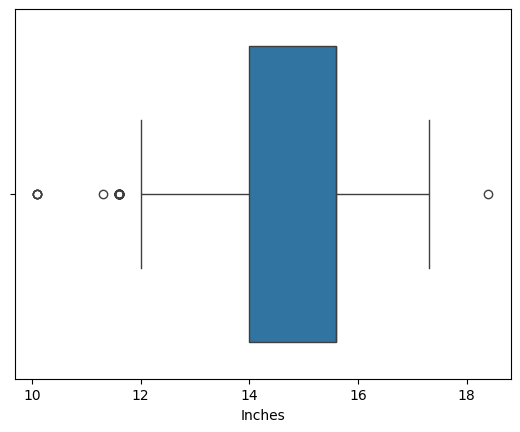

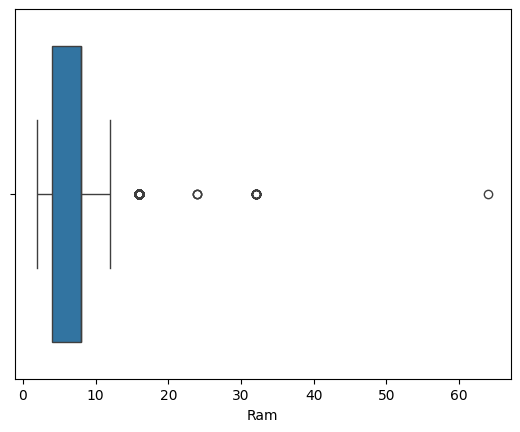

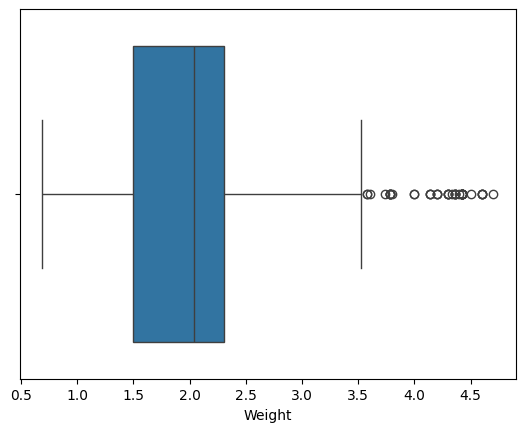

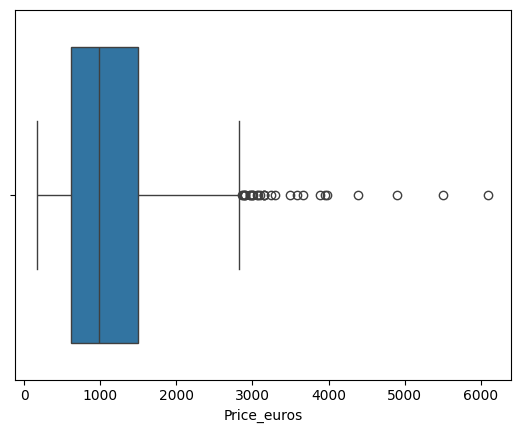

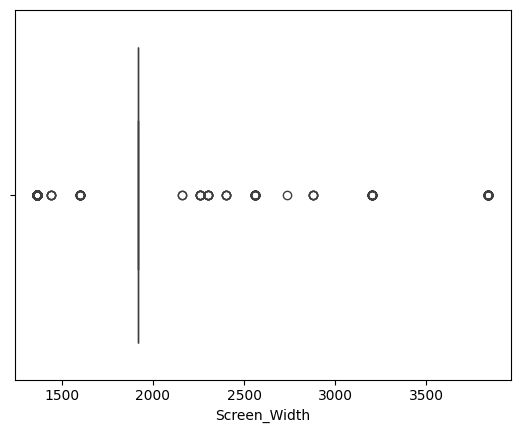

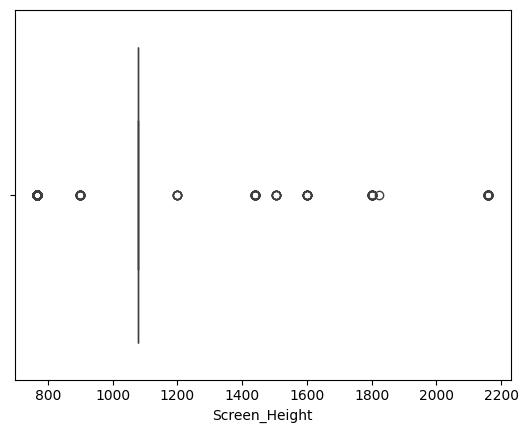

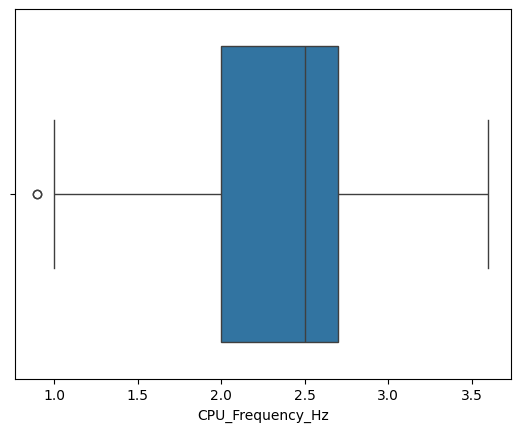

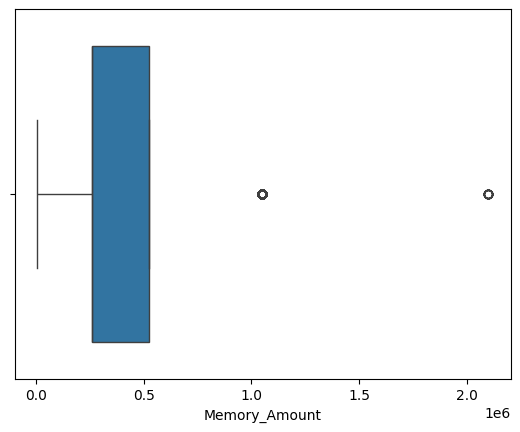

In [225]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

**Melakukan penghapusan Outlier dengan IQR**

In [226]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-226-d2615dbcc0f3>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-226-d2615dbcc0f3>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-226-d2615dbcc0f3>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [227]:
df.shape

(530, 14)

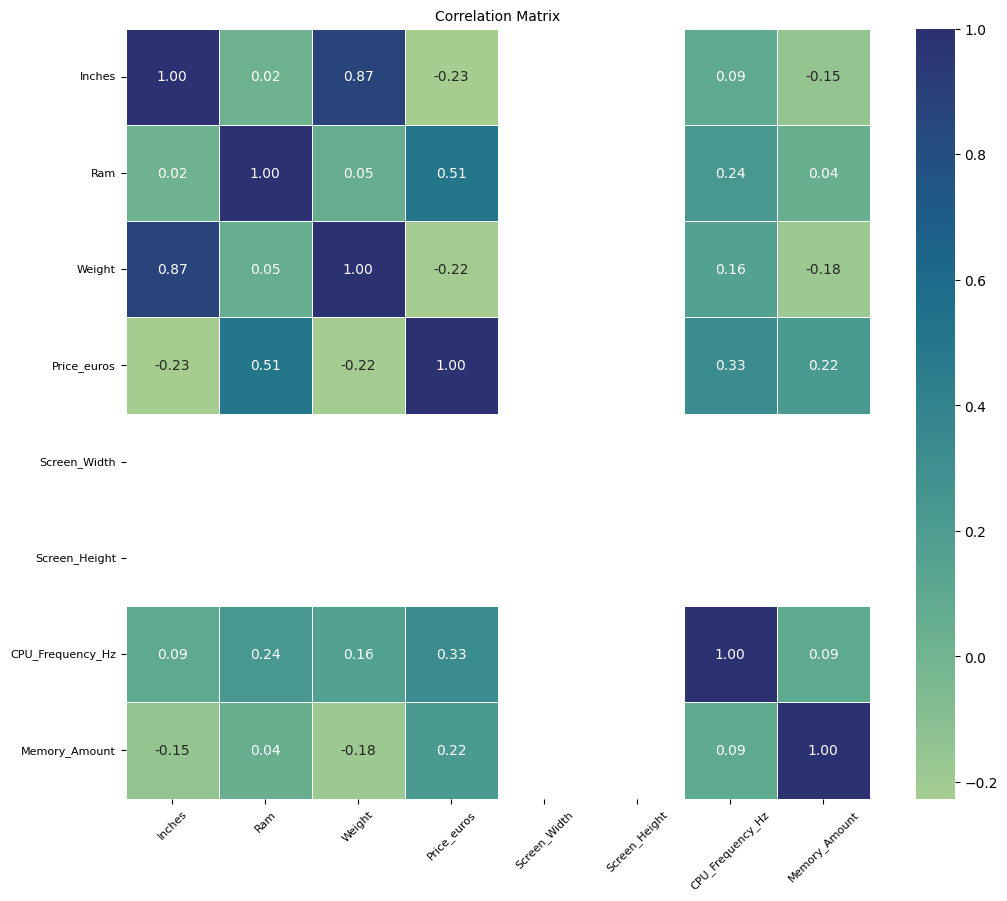

In [228]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

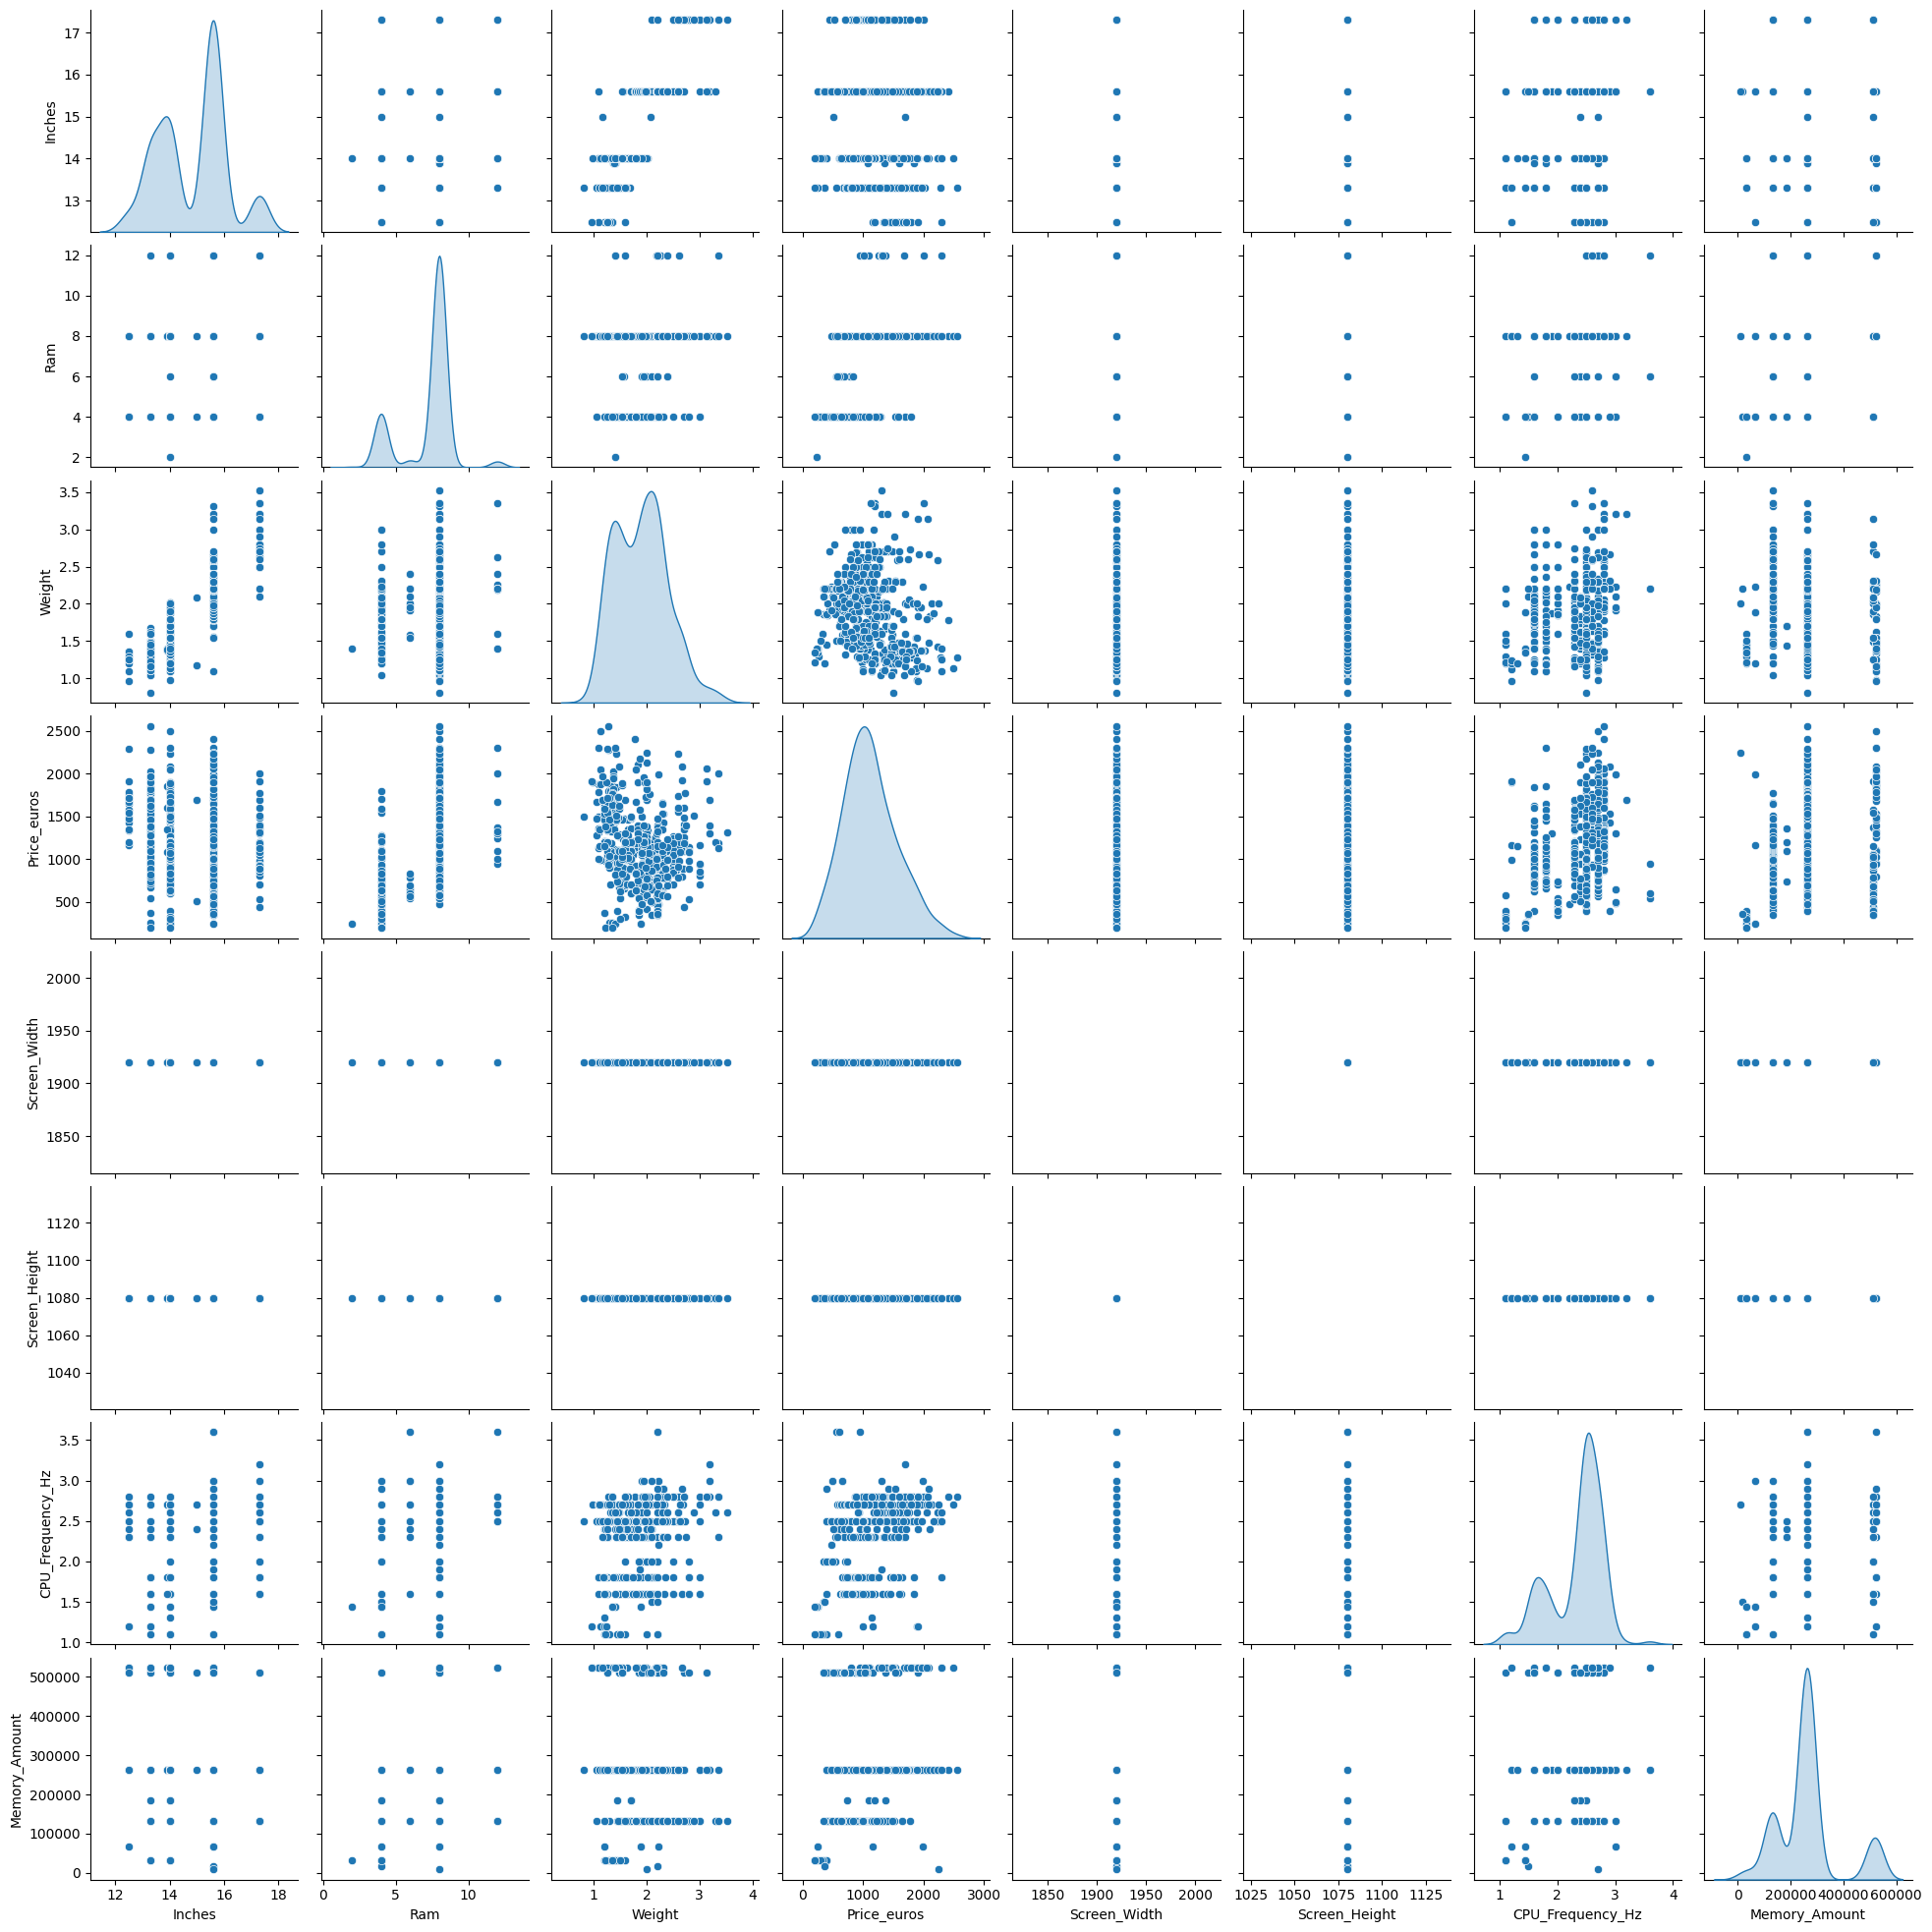

In [229]:
sns.pairplot(df, diag_kind = 'kde')

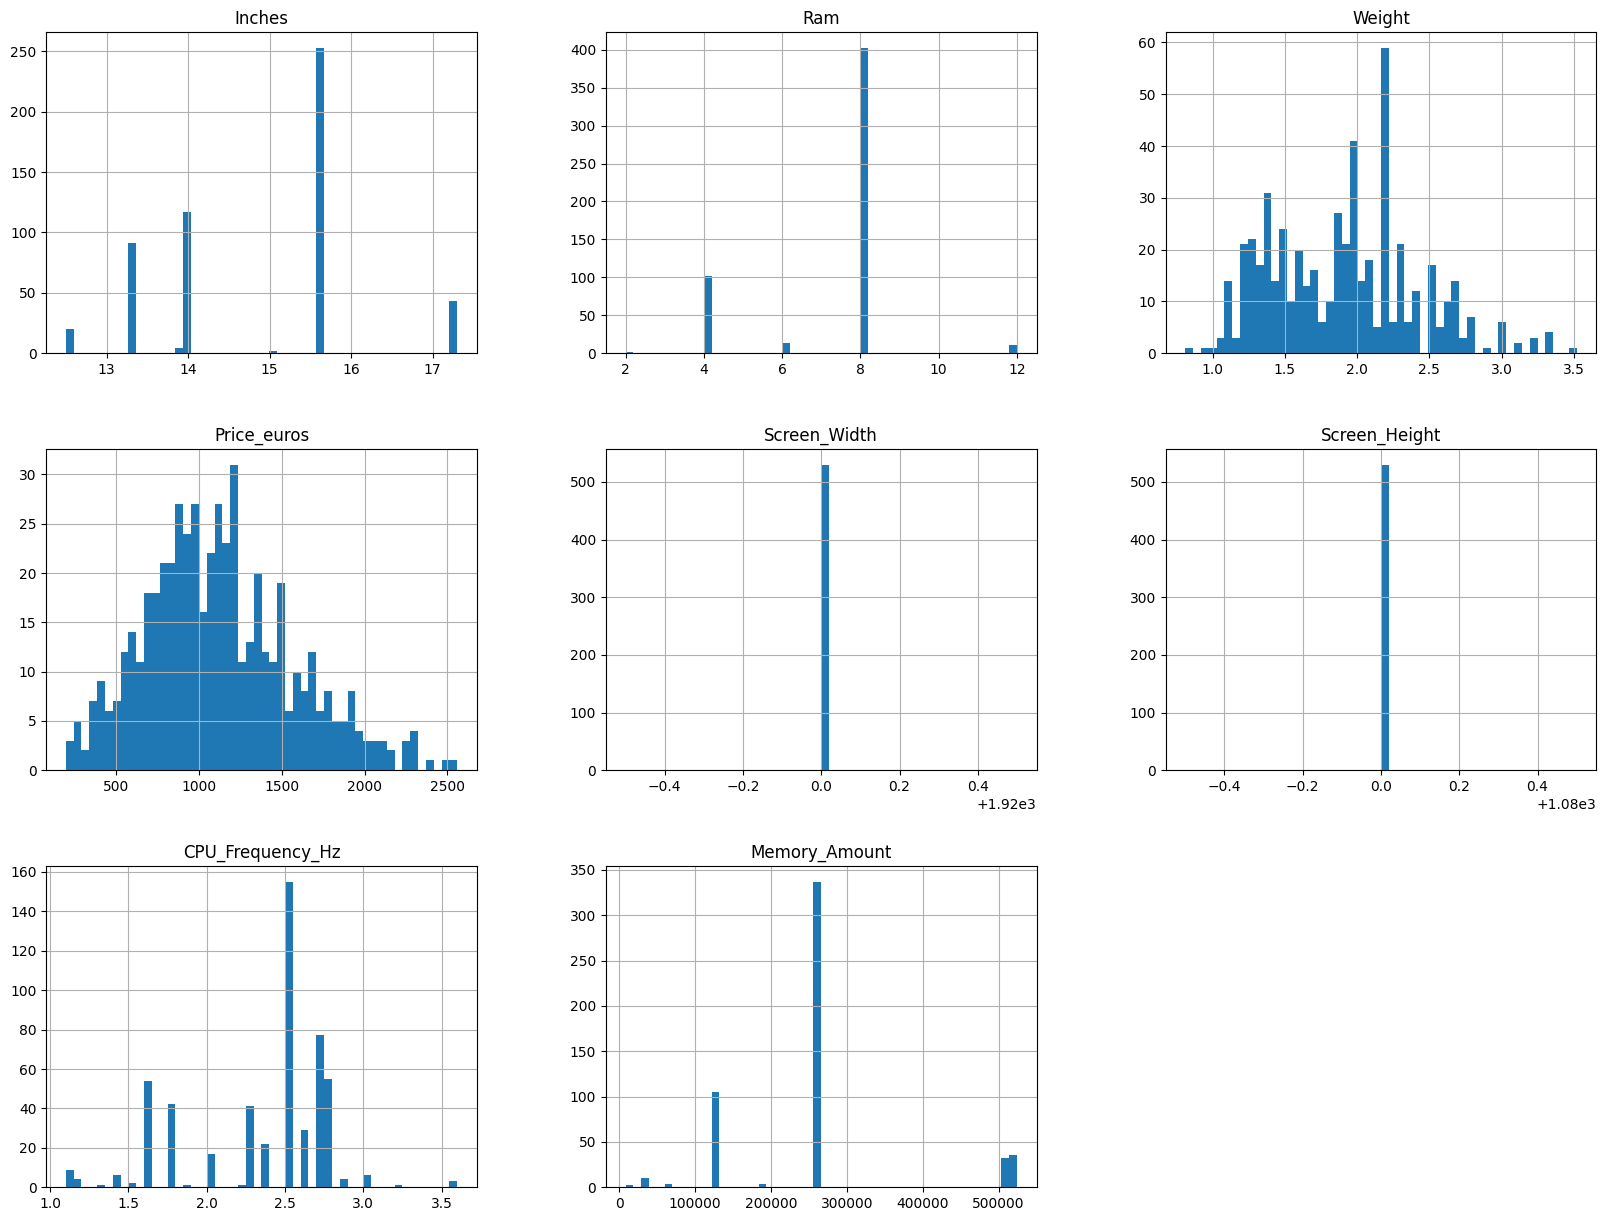

In [230]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [231]:
categorical_features = ['Company','TypeName','OpSys','CPU_Brand','Memory_Type','Gpu_Brand']

          Jumlah sampel  Persentase
HP                  137        25.8
Lenovo              132        24.9
Dell                116        21.9
Asus                 51         9.6
Acer                 31         5.8
Toshiba              24         4.5
MSI                  21         4.0
Mediacom              5         0.9
Xiaomi                3         0.6
Vero                  3         0.6
Samsung               3         0.6
Chuwi                 2         0.4
LG                    2         0.4


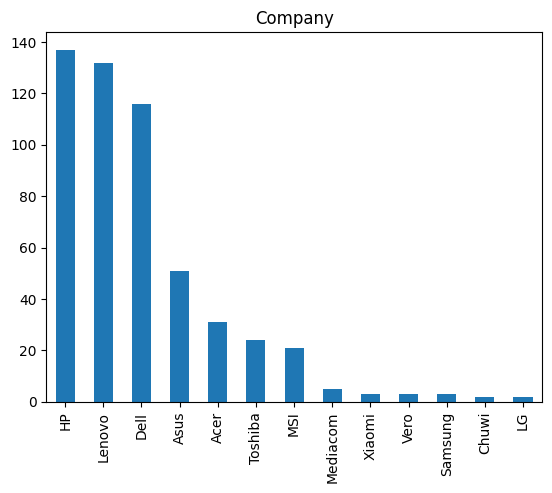

In [232]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);


                    Jumlah sampel  Persentase
Notebook                      296        55.8
Ultrabook                      97        18.3
Gaming                         63        11.9
2 in 1 Convertible             56        10.6
Workstation                    15         2.8
Netbook                         3         0.6


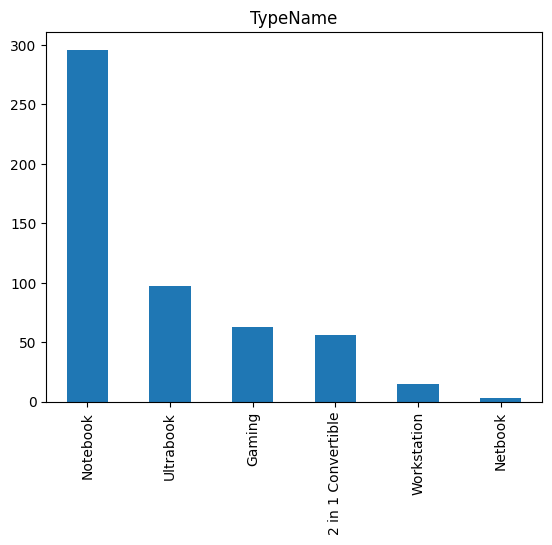

In [233]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);


            Jumlah sampel  Persentase
Windows 10            466        87.9
Windows 7              26         4.9
No OS                  20         3.8
Linux                  16         3.0
Chrome OS               2         0.4


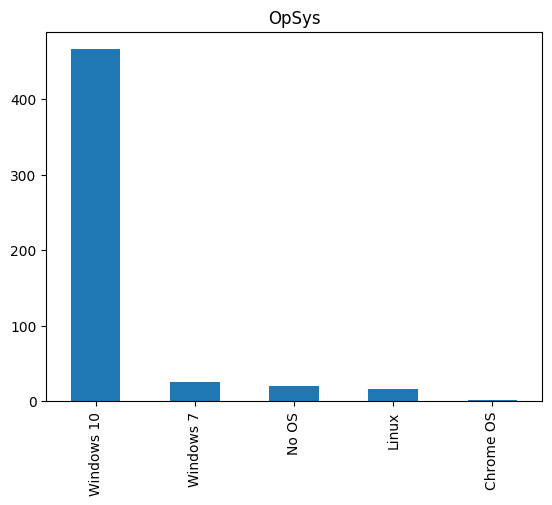

In [234]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);


       Jumlah sampel  Persentase
Intel            512        96.6
AMD               18         3.4


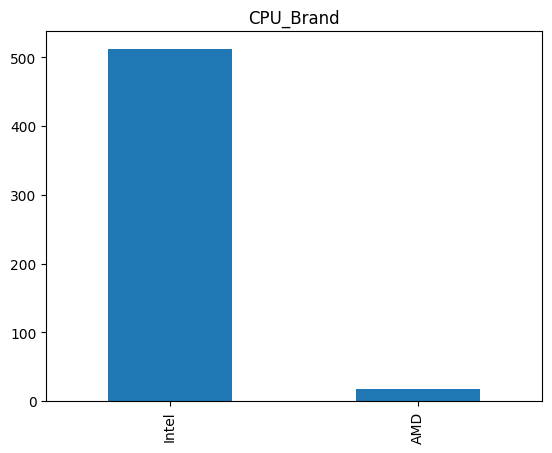

In [235]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

       Jumlah sampel  Persentase
SSD              483        91.1
HDD               33         6.2
Flash             14         2.6


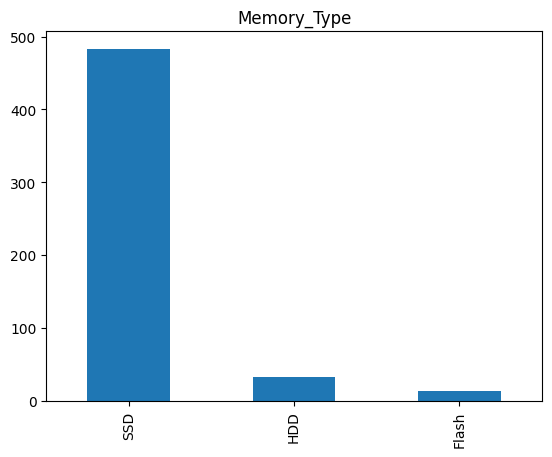

In [236]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

        Jumlah sampel  Persentase
Intel             307        57.9
Nvidia            149        28.1
AMD                74        14.0


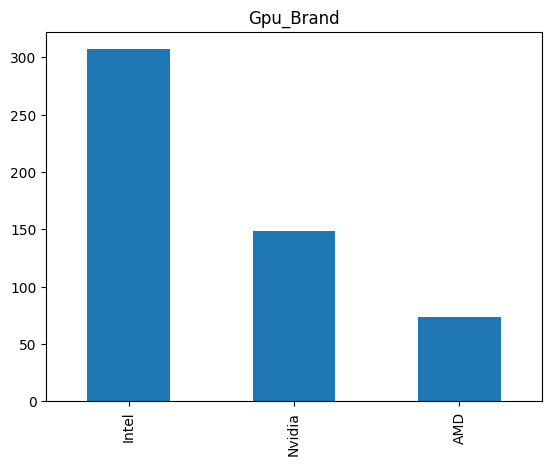

In [237]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

<ipython-input-238-c9fec90a4e0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price_euros", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-238-c9fec90a4e0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price_euros", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-238-c9fec90a4e0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price_euros", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipy

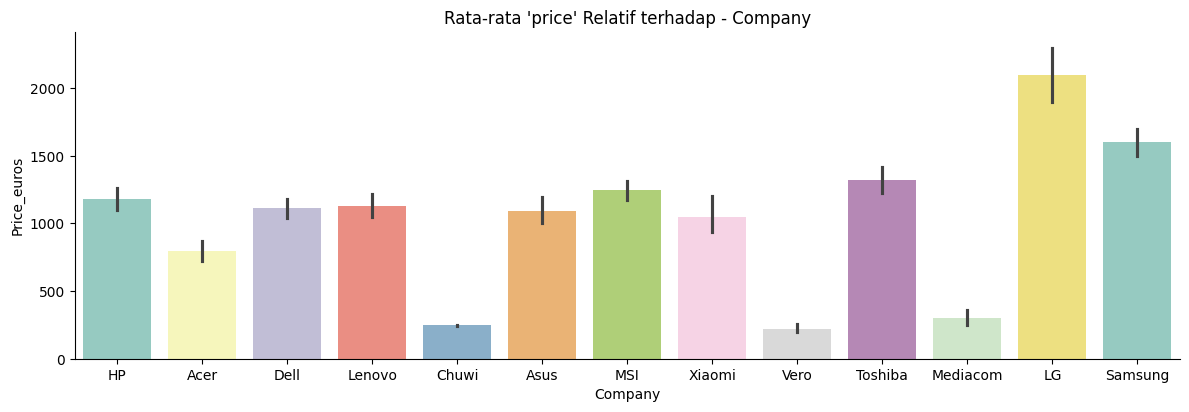

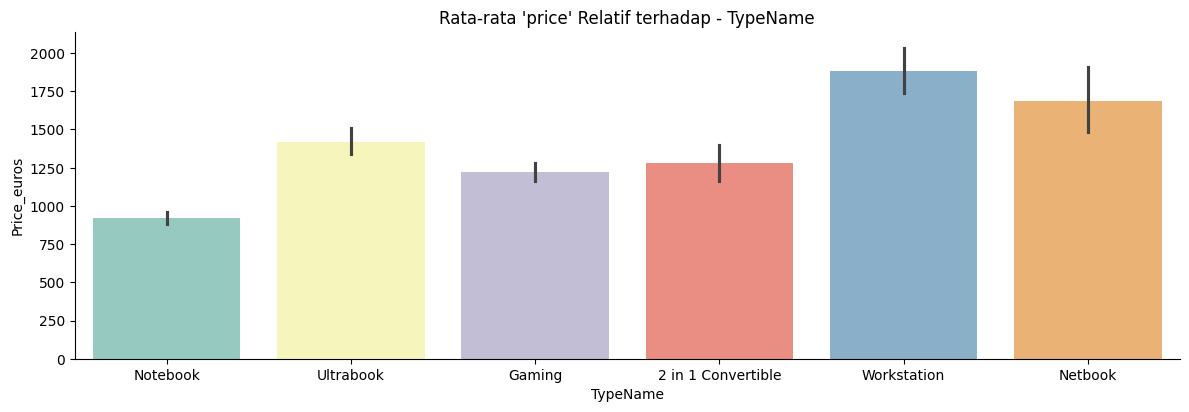

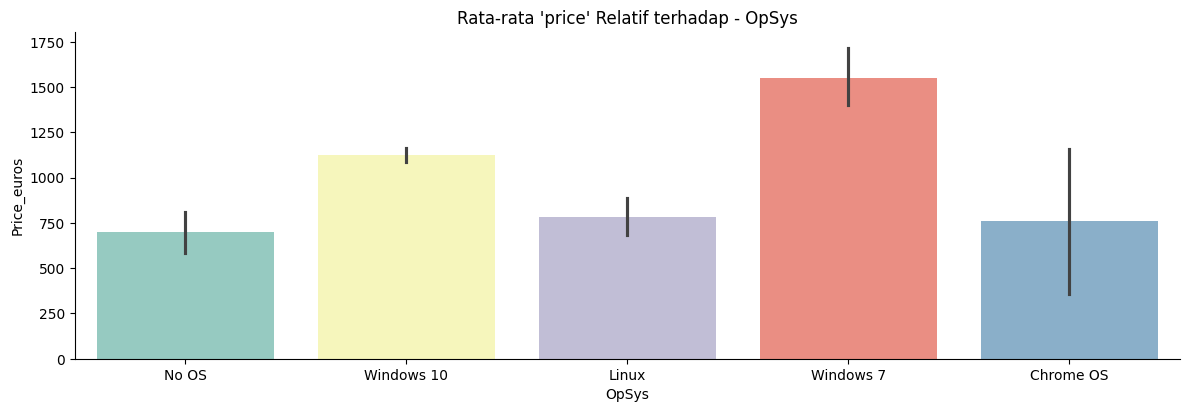

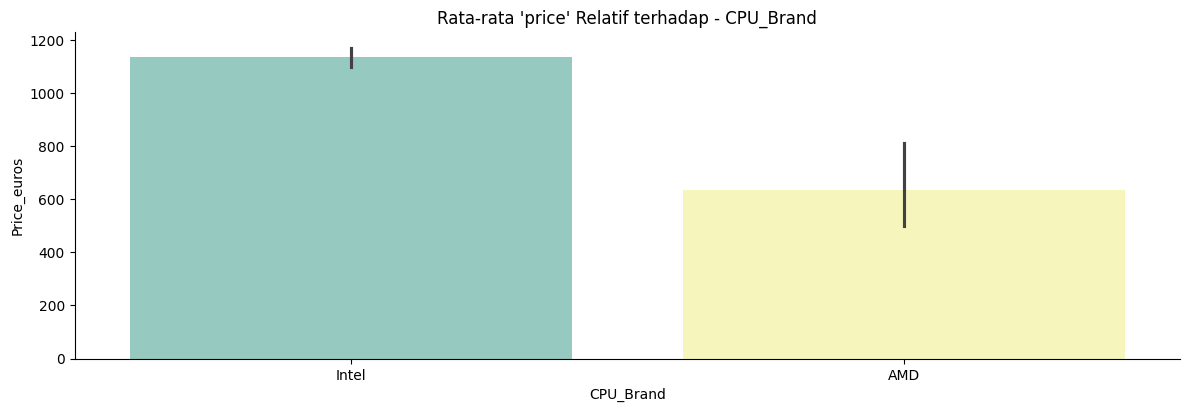

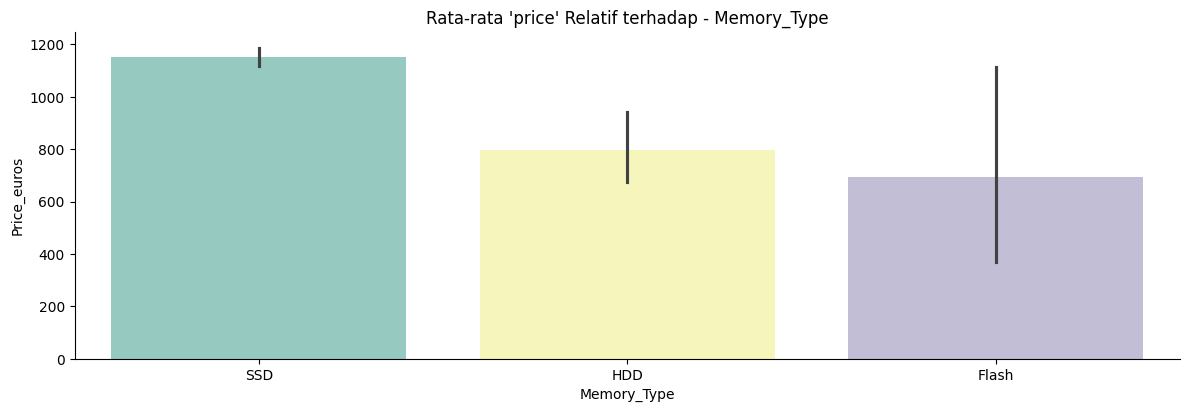

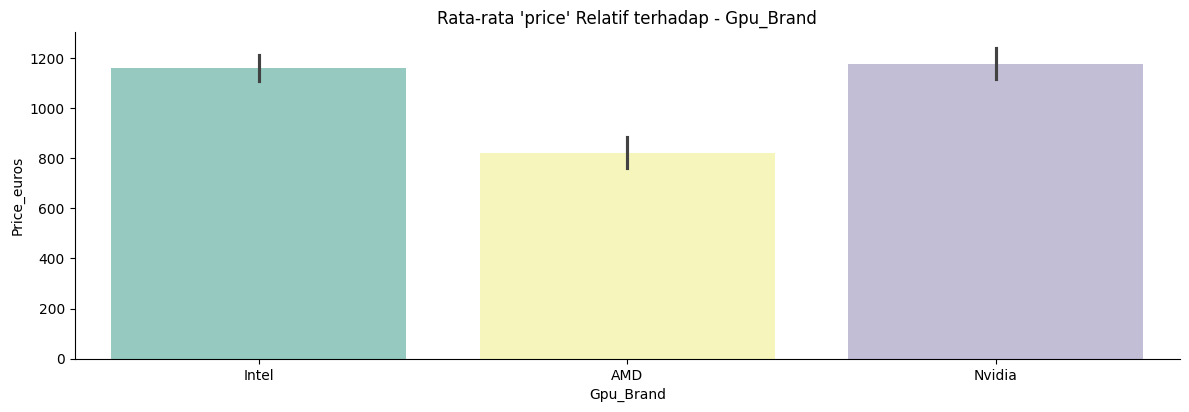

In [238]:
cat_features = df.select_dtypes(include='object').columns.to_list()



for col in cat_features:
  sns.catplot(x=col, y="Price_euros", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

<ipython-input-239-cc073b146497>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

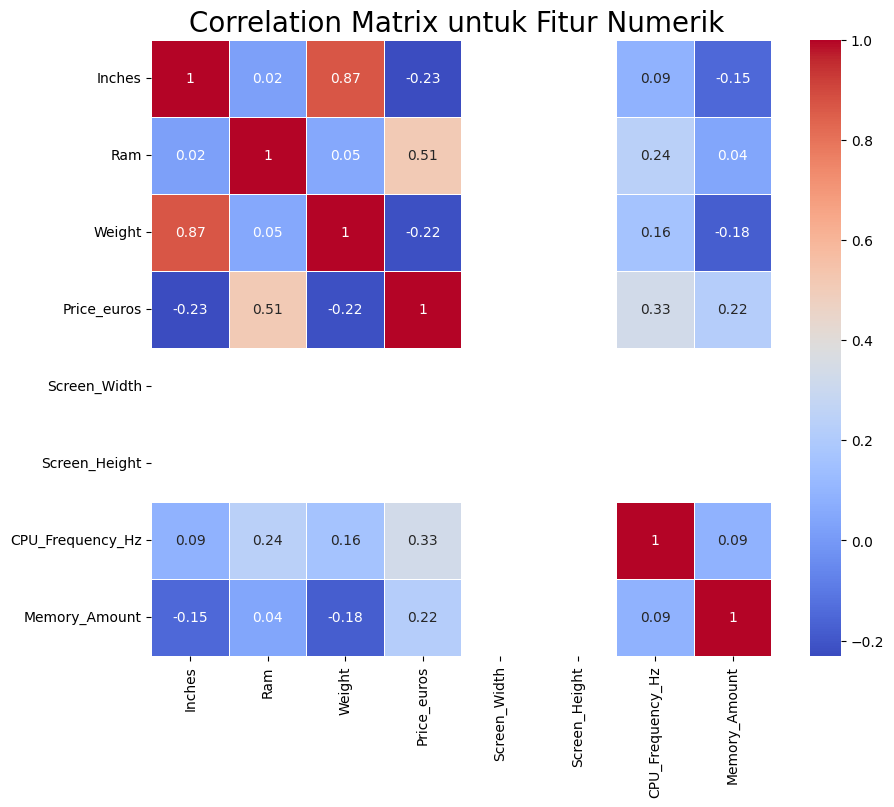

In [239]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)


# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [240]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Company'], prefix='Company')],axis=1)
df = pd.concat([df, pd.get_dummies(df['TypeName'], prefix='TypeName')],axis=1)
df = pd.concat([df, pd.get_dummies(df['OpSys'], prefix='OpSys')],axis=1)
df = pd.concat([df, pd.get_dummies(df['CPU_Brand'], prefix='CPU_Brand')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Memory_Type'], prefix='Memory_Type')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Gpu_Brand'], prefix='Gpu_Brand')],axis=1)

df.drop(['Company','TypeName','OpSys','CPU_Brand','Memory_Type','Gpu_Brand'], axis=1, inplace=True)

,Inches,Ram,Weight,Price_euros,Screen_Width,Screen_Height,CPU_Frequency_Hz,Memory_Amount,Company_Acer,Company_Asus,...,OpSys_Windows 10,OpSys_Windows 7,CPU_Brand_AMD,CPU_Brand_Intel,Memory_Type_Flash,Memory_Type_HDD,Memory_Type_SSD,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia
2,15.6,8,1.86,575.00,1920,1080,2.5,262144.0,0,0,...,0,0,0,1,0,0,1,0,1,0
9,14.0,8,1.60,770.00,1920,1080,1.6,262144.0,1,0,...,1,0,0,1,0,0,1,0,1,0
11,15.6,4,1.86,344.99,1920,1080,2.0,512000.0,0,0,...,0,0,0,1,0,1,0,0,1,0
13,15.6,4,2.20,498.90,1920,1080,2.0,262144.0,0,0,...,1,0,0,1,0,0,1,1,0,0
16,15.6,8,2.20,745.00,1920,1080,2.7,262144.0,0,0,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,15.6,6,2.40,569.00,1920,1080,2.3,131072.0,0,0,...,1,0,0,1,0,0,1,0,0,1
1253,14.0,8,1.90,1072.00,1920,1080,2.3,262144.0,0,0,...,1,0,0,1,0,0,1,0,1,0
1259,15.6,8,2.40,1229.00,1920,1080,2.6,131072.0,0,0,...,1,0,0,1,0,0,1,0,0,1
1260,14.0,4,1.80,833.01,1920,1080,2.3,131072.0,0,0,...,1,0,0,1,0,0,1,0,1,0


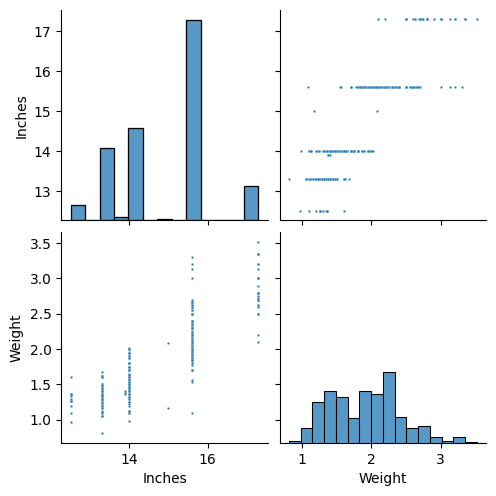

In [246]:
sns.pairplot(df[['Inches','Weight']], plot_kws={"s": 3});

In [247]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(df[['Inches','Weight']])
princ_comp = pca.transform(df[['Inches','Weight']])

In [248]:
pca.explained_variance_ratio_.round(3)

array([0.97, 0.03])

In [250]:
X = df.drop(['Price_euros'], axis= 1)
y = df["Price_euros"]

In [251]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [252]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 530
Total # of sample in train dataset: 424
Total # of sample in test dataset: 106


In [255]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Inches', 'Weight','Ram','Memory_Amount']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Inches,Weight,Ram,Memory_Amount
407,-0.680113,-1.080983,0.429871,2.256160
927,0.604377,0.823392,0.429871,-0.009518
56,0.604377,0.021550,-1.906864,-1.142357
946,-1.884322,-1.080983,0.429871,-0.009518
798,-0.760394,-1.040891,0.429871,-0.009518


In [256]:
X_train[numerical_features].describe().round(4)

,Inches,Weight,Ram,Memory_Amount
count,424.0000,424.0000,424.0000,424.0000
mean,0.0000,0.0000,0.0000,0.0000
std,1.0012,1.0012,1.0012,1.0012
min,-1.8843,-2.1835,-3.0752,-2.2044
25%,-0.6801,-0.8404,0.4299,-0.0095
50%,0.6044,0.0215,0.4299,-0.0095
75%,0.6044,0.6029,0.4299,-0.0095
max,1.9691,3.2490,2.7666,2.2562


In [257]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [258]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=7) # n_neighbors --> Jumlah tetangga terdekat
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [259]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)


In [261]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [262]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-262-0615151fc0c1>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


In [263]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3



In [264]:
mse

,train,test
KNN,72.657878,311.598273
RF,11.974819,199.446361
Boosting,80.222736,151.141047


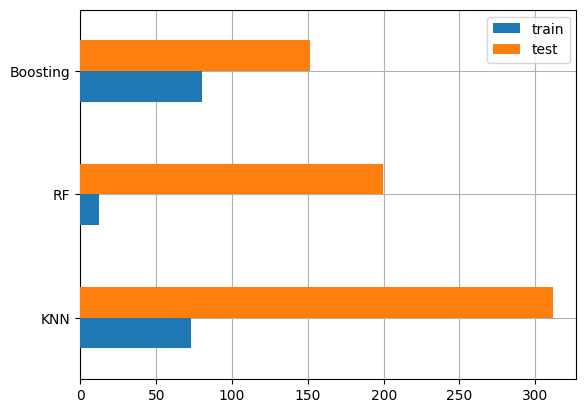

In [265]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [269]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
30,244.99,1460.9,1216.8,1093.4
1007,1449.00,1460.9,1581.4,1138.2
962,1009.00,1423.1,1168.6,1093.4
351,1304.00,1460.9,1418.5,1093.4
768,1599.00,1523.3,1228.0,1135.1
168,854.00,1460.9,1166.4,1093.4
1187,691.00,1423.1,1168.6,1093.4
237,575.00,1460.9,1183.1,1093.4
921,1296.99,1423.1,1232.3,1127.0
658,1196.00,1423.1,1336.6,1135.1
